<a href="https://colab.research.google.com/github/RoisulIslamRumi/MNIST-PyTorch/blob/main/MNIST_custom_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   List item
2.   List item



# Step 1: Load the MNIST dataset

In [ ]:
import torch
import torchvision.datasets as ds
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import ToTensor


In [ ]:
train = ds.MNIST(root='./data', train=True, download=True, transform=ToTensor())
test = ds.MNIST(root='./data', train=False, download=True,transform=ToTensor())




In [ ]:
print(train.data.size())
print(test.data.size())
print("Label size", train.targets.size())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
Label size torch.Size([60000])


# Step 2: Make the dataset iterable

In [ ]:
#Load Dataset into Dataloader
batch_size = 60
n_iters = len(train)/batch_size
print("Number of iterations:", n_iters)
num_epochs = 5

train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=batch_size, shuffle=True)

test_loader =torch.utils.data.DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

Number of iterations: 1000.0


In [ ]:
#define the class and initialize with all the layers
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()

        #conv1
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=2)
        self.relu1 = nn.ELU()
        #Maxpool1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        #conv2
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ELU()
        #Maxpool2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        #FC layer           #calculated using output formula for conv and pool
                        #channel h *w
        self.fc1 = nn.Linear(32 * 7 * 7, 10)
        #forward pass

    def forward(self, x):
        
        #conv1
        out = self.conv1(x)
        out = self.relu1(out)

        #Maxpool1
        out = self.maxpool1(out)
       
        #conv2
        out = self.conv2(out)
        out = self.relu2(out)

        #maxpool2
        out = self.maxpool2(out)
        
        out = out.view(out.size(0), -1)
        
        #Linear function
        out = self.fc1(out)

        return out



# Step 4: Instantialte Model Class

In [ ]:
model = CustomCNN()

# Step 5: Instantialte Loss Class


*   Feedforward Neural Network: Cross Entropy Loss
*   Logistic Regression: Cross Entropy Loss
* Linear Regression: MSE



In [ ]:
#cross entropy loss
criterion = nn.CrossEntropyLoss()

# Step 6: Instantialte Optimizer Class

In [ ]:
#optimizer
lr = 0.01
optimizer = optim.SGD(model.parameters(), lr=lr)

In [ ]:
print(model.parameters())

print(len(list(model.parameters())))

# Convolution 1: 16 Kernels
print(list(model.parameters())[0].size())

# Convolution 1 Bias: 16 Kernels
print(list(model.parameters())[1].size())

# Convolution 2: 32 Kernels with depth = 16
print(list(model.parameters())[2].size())

# Convolution 2 Bias: 32 Kernels with depth = 16
print(list(model.parameters())[3].size())

# Fully Connected Layer 1
print(list(model.parameters())[4].size())

# Fully Connected Layer Bias
print(list(model.parameters())[5].size())

<generator object Module.parameters at 0x7f112e64cbd0>
6
torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([10, 1568])
torch.Size([10])


#Step 7: Train the Model

In [ ]:
iter = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        #load images
        images = images.requires_grad_()

        #clear grads w.r.t. params
        optimizer.zero_grad()

        #Forward pass to get output/logits
        outputs = model(images)

        #calculate loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        #back pass
        loss.backward()
        
        #update param
        optimizer.step()

        iter += 1
        
        if iter % 50 == 0:
            #calc accuracy
            correct = 0
            total = 0
            #iterate test data
            for images,labels in test_loader:
                images = images.requires_grad_()
                outputs = model(images)
                #get predictions from the max val
                _, predicted = torch.max(outputs.data, 1)

                #total labels
                total += labels.size(0)

                #total correct predictions
                correct += (predicted == labels).sum()
            
            acc = 100 * (correct / total)
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(iter)
            accuracy_list.append(acc)
        if iter % 500 == 0:
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), acc))



Iteration: 500. Loss: 0.4040032625198364. Accuracy: 89.62000274658203
Iteration: 1000. Loss: 0.21375061571598053. Accuracy: 92.69000244140625
Iteration: 1500. Loss: 0.2152426540851593. Accuracy: 94.5999984741211
Iteration: 2000. Loss: 0.2319541722536087. Accuracy: 95.42000579833984
Iteration: 2500. Loss: 0.12484902888536453. Accuracy: 96.27999877929688
Iteration: 3000. Loss: 0.14430952072143555. Accuracy: 96.83000183105469
Iteration: 3500. Loss: 0.12849317491054535. Accuracy: 97.19999694824219
Iteration: 4000. Loss: 0.17861014604568481. Accuracy: 97.15999603271484
Iteration: 4500. Loss: 0.046488355845212936. Accuracy: 97.2699966430664
Iteration: 5000. Loss: 0.19586697220802307. Accuracy: 97.79999542236328


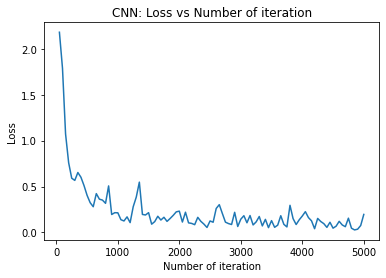

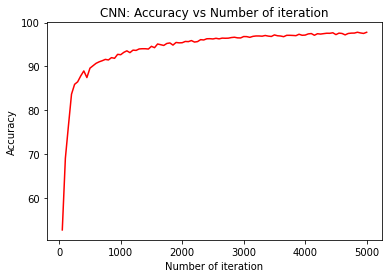

In [ ]:
import matplotlib.pyplot as plt
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.8.0
Running on TPU  ['10.74.153.146:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.74.153.146:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.74.153.146:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


> 98.225
> 98.067
> 98.633
> 99.017
> 98.675


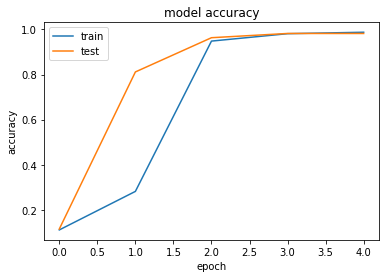

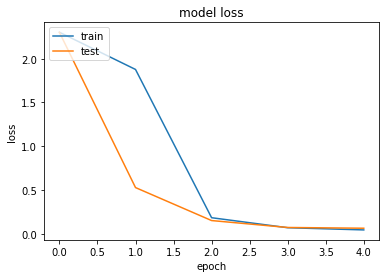

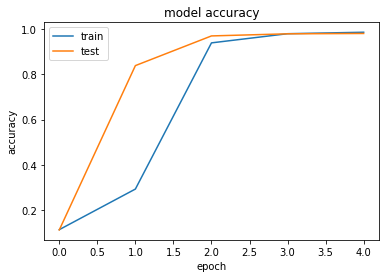

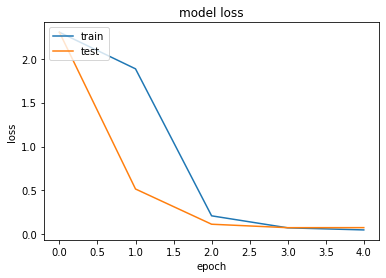

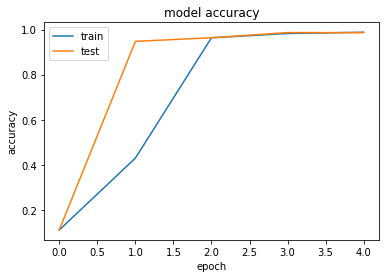

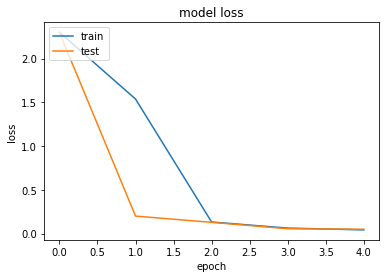

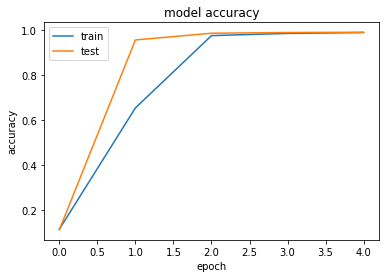

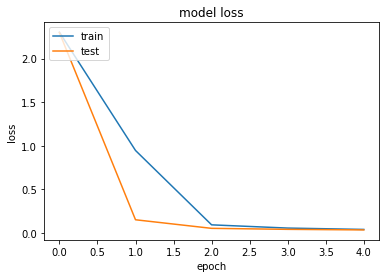

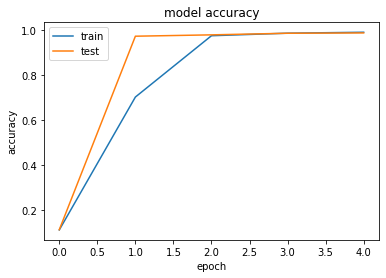

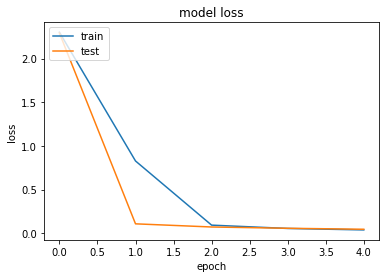

Accuracy: mean=98.523 std=0.339, n=5


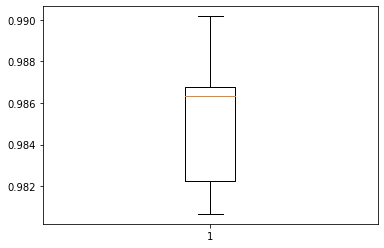

In [3]:
# cnn model with batch normalization for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
%matplotlib inline

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model2():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model():
    model = Sequential()

    model.add(Conv2D(64, 3, activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, 3, activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))
    
    model.add(Conv2D(128, 3, activation='relu', padding='same'))
    model.add(Conv2D(128, 3, activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))
  
    
    model.add(Conv2D(256, 3, activation='relu', padding='same'))
    model.add(Conv2D(256, 3, activation='relu', padding='same'))
    model.add(Conv2D(256, 3, activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))

    
    model.add(Conv2D(512, 3, activation='relu', padding='same'))
    model.add(Conv2D(512, 3, activation='relu', padding='same'))
    model.add(Conv2D(512, 3, activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 1)) # default stride is 2
    
    
    model.add(Conv2D(512, 3, activation='relu', padding='same'))
    model.add(Conv2D(512, 3, activation='relu', padding='same'))
    model.add(Conv2D(512, 3, activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 1)) # default stride is 2
 
    
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
	# compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=5, batch_size=60, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories


# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		# plt.subplot(2, 1, 1)
		# plt.title('Cross Entropy Loss')
		# plt.plot(histories[i].history['loss'], color='blue', label='train')
		# plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# # plot accuracy
		# plt.subplot(2, 1, 2)
		# plt.title('Classification Accuracy')
		# plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		# plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
		
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['accuracy'])
		plt.plot(histories[i].history['val_accuracy'])
		plt.title('model accuracy')
		plt.ylabel('accuracy')
		plt.xlabel('epoch')
		plt.legend(['train', 'test'], loc='upper left')
		plt.show()
		# summarize history for loss
		plt.plot(histories[i].history['loss'])
		plt.plot(histories[i].history['val_loss'])
		plt.title('model loss')
		plt.ylabel('loss')
		plt.xlabel('epoch')
		plt.legend(['train', 'test'], loc='upper left')
		plt.show()
	plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
with tpu_strategy.scope():
    run_test_harness()